# Schwarzschild null geodesics: elliptic integrals

This [Jupyter/SageMath](https://www.sagemath.org/) notebook is relative to the lectures
[Geometry and physics of black holes](http://luth.obspm.fr/~luthier/gourgoulhon/bh16/).

To run it, you must start SageMath with `sage -n jupyter`.

In [1]:
version()

'SageMath version 9.1.beta4, Release Date: 2020-02-13'

In [2]:
%display latex

## Function $\Phi_b(u)$

We evaluate $\Phi_b(u)$ via the functions [elliptic_f](https://doc.sagemath.org/html/en/reference/functions/sage/functions/special.html?highlight=elliptic_f#sage.functions.special.EllipticF) and [elliptic_kc](https://doc.sagemath.org/html/en/reference/functions/sage/functions/special.html?highlight=elliptic_f#sage.functions.special.EllipticKC) of SageMath, taking into account that the second argument of `elliptic_f` and the argument of `elliptic_kc` is $m = k^2$ and not $k$.

In [3]:
def Phi(u, b):
    u = RDF(u)
    b = RDF(b)
    bc = RDF(3*sqrt(3))
    if b > bc: 
        xi = 2*arcsin(bc/b)/3
        un = RDF(1/3*cos(xi + 2*pi/3) + 1/6)
        up = RDF(1/3*cos(xi + 4*pi/3) + 1/6)
        ua = RDF(1/3*cos(xi) + 1/6)
        k2 = (up - un)/(ua - un)
        phi = arcsin(sqrt((u - un)/(up - un)))
        # NB: elliptic_kc() and elliptic_f() takes m=k^2 as argument
        aa = elliptic_kc(k2) - elliptic_f(phi, k2)
        return sqrt(2/(ua - un)) * aa
    else:
        xi = bc/b - sqrt((bc/b)^2 - 1)
        un = (1 - xi^(2/3) - xi^(-2/3))/6
        us = sqrt(un*(3*un - 1)) + un
        k2 = (us - 2.5*un + 0.25)/(2*(us - un))
        phi = arccos(abs(us - u)/(us + u - 2*un))
        # NB: elliptic_kc() take m=k^2 as argument
        aa = elliptic_kc(k2) - elliptic_f(phi, k2)
        if u > us:
            aa = - aa
        return aa / sqrt(2*(us - un))            

## Case $b > b_{\rm c}$

In [4]:
def u_p(b):
    b = RDF(b)
    bc = RDF(3*sqrt(3))
    xi = 2*arcsin(bc/b)/3
    return RDF(1/3*cos(xi + 4*pi/3) + 1/6)

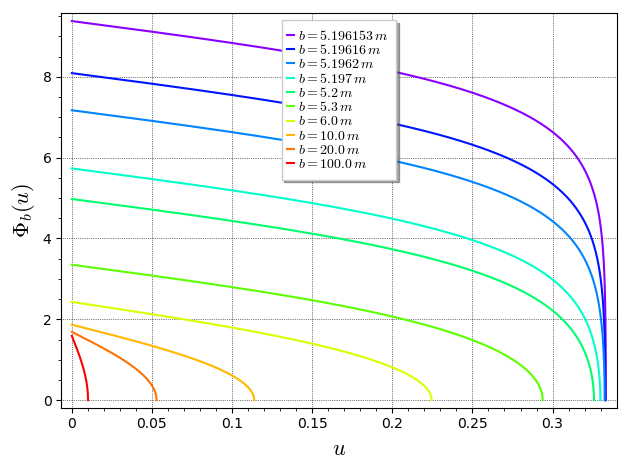

In [5]:
bc = 3*sqrt(3)
g = Graphics()
b_list = [5.196153, 5.19616, 5.1962, 5.197, 5.2, 5.3, 6, 10, 20, 100]
bmin = b_list[0]
bmax = b_list[-1]
for b1 in b_list:
    g += plot(lambda u: Phi(u, b1), (0, u_p(b1)),
              legend_label=r"$b={}\, m$".format(float(b1)), 
              thickness=1.5, color=hue(1 - log((b1 - bc)/(bmax - bc))/25),
              axes_labels=[r'$u$', r'$\Phi_b(u)$'], 
              frame=True, gridlines=True, axes=False)
show(g, legend_loc='upper center')

In [6]:
g.save("gis_Phib_b_gt_bc.pdf", legend_loc='upper center')

## Case $b < b_{\rm c}$

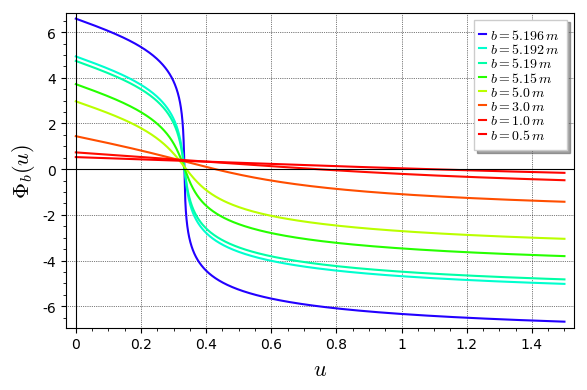

In [7]:
g = Graphics()
b_list = [5.196, 5.192, 5.19, 5.15, 5, 3, 1, 1/2]
bmin = b_list[0]
bmax = b_list[-1]
for b1 in b_list:
    g += plot(lambda u: Phi(u, b1), (0, 1.5),
              legend_label=r"$b={}\, m$".format(float(b1)), 
              thickness=1.5, color=hue(1 - log((b1 - bc)/(bmax - bc))/15),
              axes_labels=[r'$u$', r'$\Phi_b(u)$'], 
              frame=True, gridlines=True, axes=True)
g

In [8]:
g.save("gis_Phib_b_lt_bc.pdf")

## Asymptotic direction $\varphi_\infty$ from some emission point

In [9]:
def phi_inf(r_em, b, phi_em=0, pre_periastron=True, eps_L=1):
    u_em = RDF(1/r_em)
    b = RDF(b)
    bc = RDF(3*sqrt(3))
    phi_em = RDF(phi_em)
    if b > bc: 
        if pre_periastron:
            return phi_em + eps_L*(Phi(0, b) + Phi(u_em, b))
        return phi_em + eps_L*(Phi(0, b) - Phi(u_em, b))
    return phi_em + eps_L*(Phi(0, b) - Phi(u_em, b))

In [10]:
phi_inf(+oo, 6)

4.860980963819962

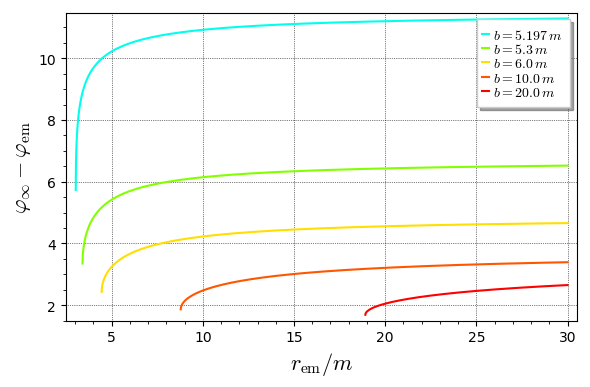

In [11]:
bc = 3*sqrt(3)
g = Graphics()
b_list = [5.197, 5.3, 6, 10, 20]
bmin = b_list[0]
bmax = b_list[-1]
for b1 in b_list:
    g += plot(lambda r: phi_inf(r, b1, pre_periastron=True), (1/u_p(b1), 30),
              legend_label=r"$b={}\, m$".format(float(b1)), 
              thickness=1.5, 
#             color=hue((b1 - bc)/(bmax - bc)/3),
              color=hue(1 - log((b1 - bc)/(bmax - bc))/20),
              axes_labels=[r'$r_{\rm em}/m$', r'$\varphi_\infty - \varphi_{\rm em}$'], 
              frame=True, gridlines=True, axes=False)
g

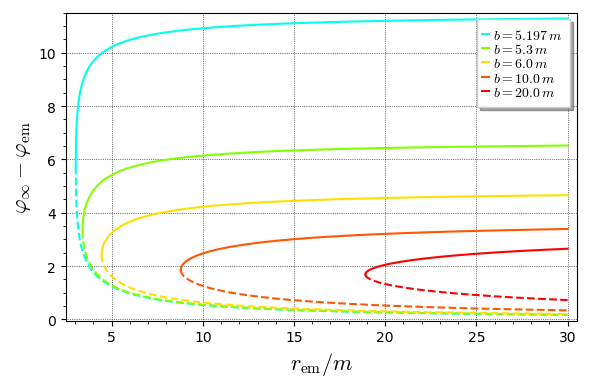

In [12]:
g2 = Graphics()
for b1 in b_list:
    g2 += plot(lambda r: phi_inf(r, b1, pre_periastron=False), (1/u_p(b1), 30),
               linestyle='dashed', thickness=1.5, 
#              color=hue((b1 - bc)/(bmax - bc)/3)
               color=hue(1 - log((b1 - bc)/(bmax - bc))/20)
              )
g + g2

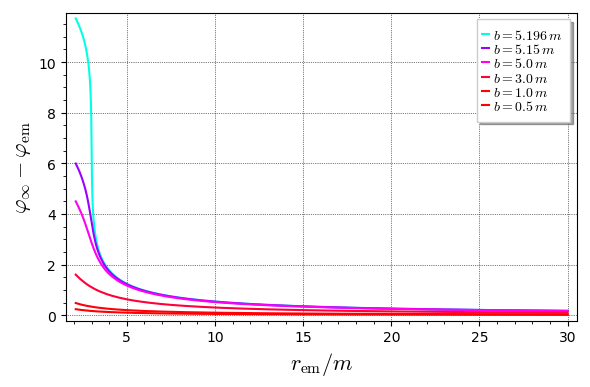

In [13]:
b_list = [5.196, 5.15, 5, 3, 1, 1/2]
bmin = b_list[-1]
bmax = b_list[0]
g3 = Graphics()
for b1 in b_list:
    g3 += plot(lambda r: phi_inf(r, b1), (2.1, 30),
              legend_label=r"$b={}\, m$".format(float(b1)), 
              thickness=1.5, 
#              color=hue((b1 - bc)/(bc - bmin)/3),
              color=hue(1 + log((bc - b1)/(bc - bmin))/20),
              axes_labels=[r'$r_{\rm em}/m$', r'$\varphi_\infty - \varphi_{\rm em}$'], 
              frame=True, gridlines=True, axes=False)
g3

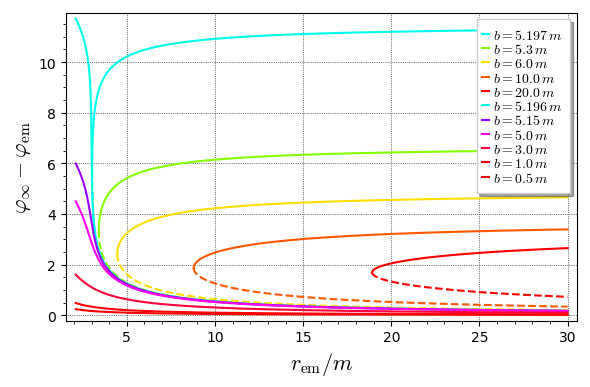

In [14]:
g + g2 + g3

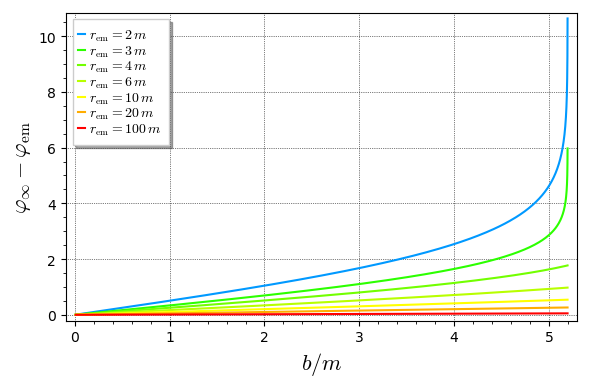

In [15]:
bc = RDF(3*sqrt(3))
g = Graphics()
r_list = [2, 3, 4, 6, 10, 20, 100]
rmin = 0.99*r_list[0]
rmax = r_list[-1]
def huecol(r):
    return - log((r1 - rmin)/(rmax - rmin))/15
for r1 in r_list:
    g += plot(lambda b: phi_inf(r1, b), (0.01, 0.9999*bc),
              legend_label=r"$r_{{\rm em}}={:.0f}\, m$".format(float(r1)), 
              thickness=1.5, plot_points=400,
              color=hue(huecol(r1)),
              axes_labels=[r'$b/m$', r'$\varphi_\infty - \varphi_{\rm em}$'], 
              frame=True, gridlines=True, axes=False)
g

verbose 0 (3797: plot.py, generate_plot_points) WARNING: When plotting, failed to evaluate function at 800 points.
verbose 0 (3797: plot.py, generate_plot_points) Last error message: ''
verbose 0 (3797: plot.py, generate_plot_points) WARNING: When plotting, failed to evaluate function at 800 points.
verbose 0 (3797: plot.py, generate_plot_points) Last error message: ''
verbose 0 (3797: plot.py, generate_plot_points) WARNING: When plotting, failed to evaluate function at 746 points.
verbose 0 (3797: plot.py, generate_plot_points) Last error message: ''
verbose 0 (3797: plot.py, generate_plot_points) WARNING: When plotting, failed to evaluate function at 547 points.
verbose 0 (3797: plot.py, generate_plot_points) Last error message: ''
verbose 0 (3797: plot.py, generate_plot_points) WARNING: When plotting, failed to evaluate function at 96 points.
verbose 0 (3797: plot.py, generate_plot_points) Last error message: ''


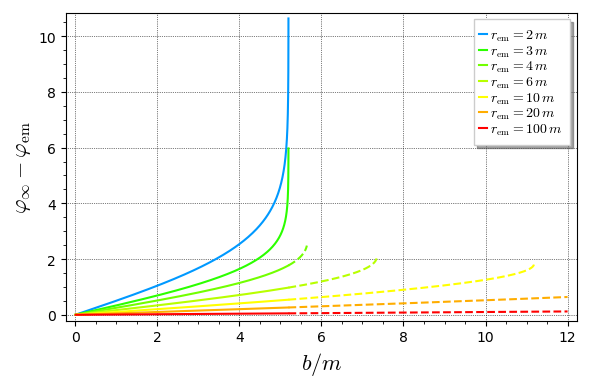

In [16]:
g2 = Graphics()
for r1 in r_list:
    g2 += plot(lambda b: phi_inf(r1, b, pre_periastron=False), (1.0001*bc, 12),
              thickness=1.5, linestyle='dashed', plot_points=800,
              color=hue(huecol(r1)))
g += g2
g

verbose 0 (3797: plot.py, generate_plot_points) WARNING: When plotting, failed to evaluate function at 800 points.
verbose 0 (3797: plot.py, generate_plot_points) Last error message: ''
verbose 0 (3797: plot.py, generate_plot_points) WARNING: When plotting, failed to evaluate function at 800 points.
verbose 0 (3797: plot.py, generate_plot_points) Last error message: ''
verbose 0 (3797: plot.py, generate_plot_points) WARNING: When plotting, failed to evaluate function at 746 points.
verbose 0 (3797: plot.py, generate_plot_points) Last error message: ''
verbose 0 (3797: plot.py, generate_plot_points) WARNING: When plotting, failed to evaluate function at 547 points.
verbose 0 (3797: plot.py, generate_plot_points) Last error message: ''
verbose 0 (3797: plot.py, generate_plot_points) WARNING: When plotting, failed to evaluate function at 97 points.
verbose 0 (3797: plot.py, generate_plot_points) Last error message: ''


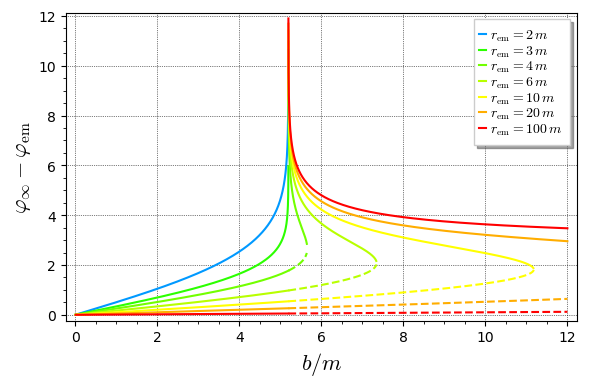

In [17]:
g3 = Graphics()
for r1 in r_list:
    g3 += plot(lambda b: phi_inf(r1, b, pre_periastron=True), (1.0001*bc, 12),
              thickness=1.5, plot_points=800,
              color=hue(huecol(r1)))
g += g3
g

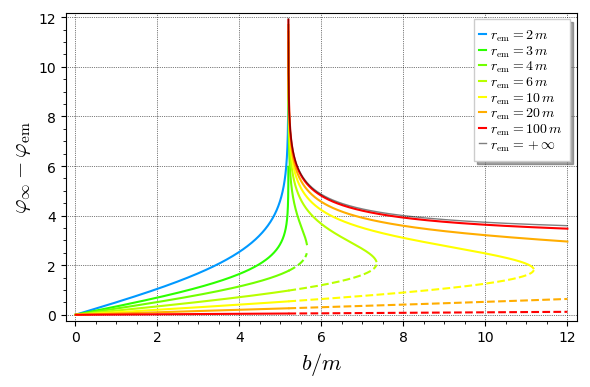

In [18]:
g4 = plot(lambda b: phi_inf(+oo, b, pre_periastron=True), (1.0001*bc, 12),
          thickness=1., plot_points=400,
          color='black', alpha=0.5,
          legend_label=r"$r_{{\rm em}}=+\infty$")
g += g4
g

In [19]:
g.save("gis_phi_inf_em_b.pdf")